In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix

In [2]:
# read file 

file_path = "./breast-cancer.csv"
bc_pd = pd.read_csv(file_path)

In [3]:
bc_pd.head()

# diagnosis is the label, M=Malignant, B=benign

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
bc_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


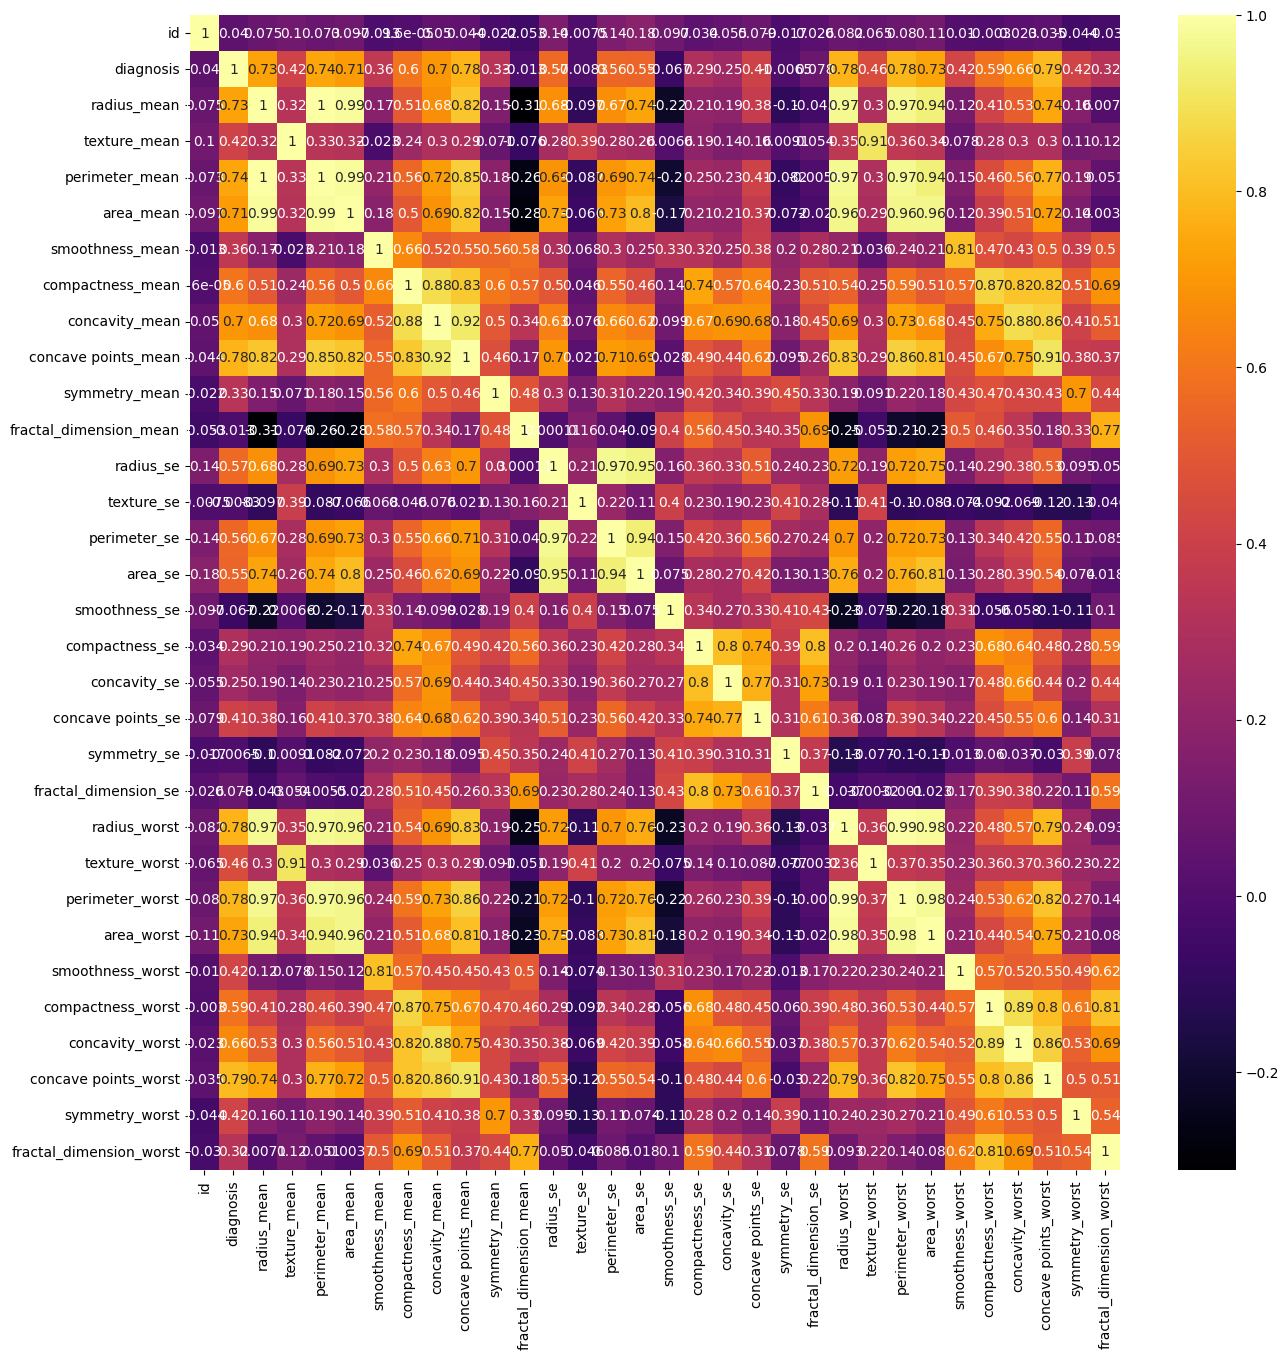

In [5]:
# correlation analysis
label_map = { # category label
    "M": 1,
    "B": 0
}
label_pd = bc_pd.copy()
label_pd['diagnosis'] = bc_pd['diagnosis'].map(lambda x: label_map[x])


corr = label_pd.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='inferno', annot=True)
plt.show()

In [6]:
label_pd = label_pd.drop("id", axis=1)
train, test = train_test_split(label_pd, random_state=22, test_size=0.25)

train, test, len(train), len(test)

(     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 371          0       15.190         13.21           97.65      711.8   
 58           0       13.050         19.31           82.61      527.2   
 385          1       14.600         23.29           93.97      664.7   
 13           1       15.850         23.95          103.70      782.7   
 471          0       12.040         28.14           76.85      449.9   
 ..         ...          ...           ...             ...        ...   
 491          0       17.850         13.23          114.60      992.1   
 502          0       12.540         16.32           81.25      476.3   
 358          0        8.878         15.49           56.74      241.0   
 356          0       13.050         18.59           85.09      512.0   
 132          1       16.160         21.54          106.20      809.8   
 
      smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 371          0.07963           0.06934   

In [7]:

y_train = train['diagnosis']
x_train = train.drop('diagnosis', axis=1)

x_train, y_train

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 371       15.190         13.21           97.65      711.8          0.07963   
 58        13.050         19.31           82.61      527.2          0.08060   
 385       14.600         23.29           93.97      664.7          0.08682   
 13        15.850         23.95          103.70      782.7          0.08401   
 471       12.040         28.14           76.85      449.9          0.08752   
 ..           ...           ...             ...        ...              ...   
 491       17.850         13.23          114.60      992.1          0.07838   
 502       12.540         16.32           81.25      476.3          0.11580   
 358        8.878         15.49           56.74      241.0          0.08293   
 356       13.050         18.59           85.09      512.0          0.10820   
 132       16.160         21.54          106.20      809.8          0.10080   
 
      compactness_mean  concavity_mean  concave po

In [8]:

y_test = test['diagnosis']
x_test = test.drop('diagnosis', axis=1)

x_test, y_test

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 123        14.50         10.89           94.28      640.7          0.11010   
 30         18.63         25.11          124.80     1088.0          0.10640   
 370        16.35         23.29          109.00      840.4          0.09742   
 262        17.29         22.13          114.40      947.8          0.08999   
 89         14.64         15.24           95.77      651.9          0.11320   
 ..           ...           ...             ...        ...              ...   
 327        12.03         17.93           76.09      446.0          0.07683   
 411        11.04         16.83           70.92      373.2          0.10770   
 253        17.30         17.08          113.00      928.2          0.10080   
 158        12.06         12.74           76.84      448.6          0.09311   
 508        16.30         15.70          104.70      819.8          0.09427   
 
      compactness_mean  concavity_mean  concave po

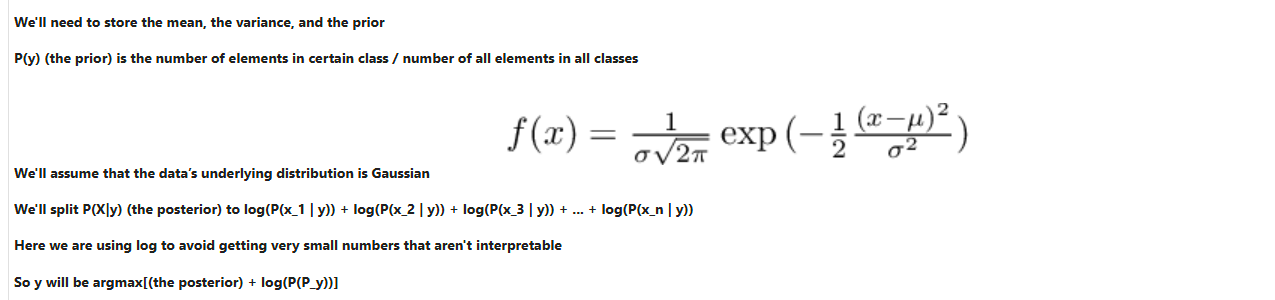

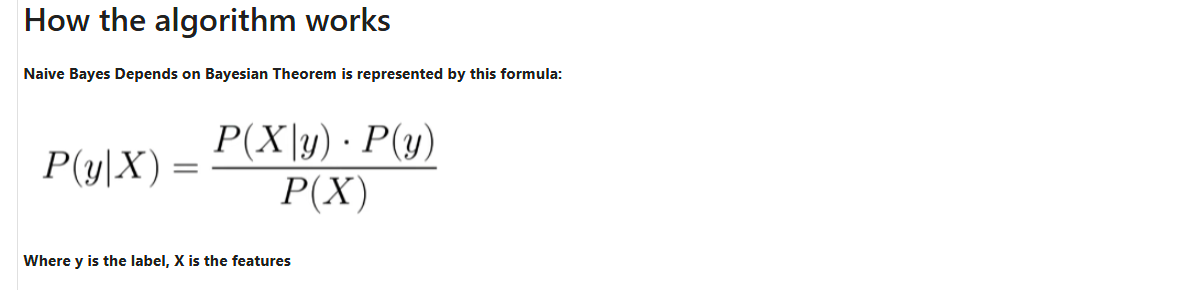


In [9]:
x_test = x_test.astype(float)
x_train = x_train.astype(float)
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [10]:
x_test[0:5].dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [11]:
label_map_rev = {
     1: "M", 0: "B"
}

from gaussian_nb import MyGaussianNaiveBayes
myNB = MyGaussianNaiveBayes()

myNB = myNB.fit(X=x_train, y=y_train)

y_pred, prob = myNB.predict(x_test[0:5])
y_pred
# y_pred = my_model.predict(X_test)

# display(y_pred)
# display(y_pred)

[np.float64(11.39523292346602), np.float64(-6.121249244057838)]
[np.float64(-164.2915167825197), np.float64(7.651061513962245)]
[np.float64(-58.8780071049567), np.float64(4.984892390878261)]
[np.float64(-84.92885939320831), np.float64(4.543673297283395)]
[np.float64(-3.0586531231806338), np.float64(1.8845783639646916)]


[0, 1, 1, 1, 1]

[np.float64(11.39523292346602), np.float64(-6.121249244057838)]
[np.float64(-164.2915167825197), np.float64(7.651061513962245)]
[np.float64(-58.8780071049567), np.float64(4.984892390878261)]
[np.float64(-84.92885939320831), np.float64(4.543673297283395)]
[np.float64(-3.0586531231806338), np.float64(1.8845783639646916)]


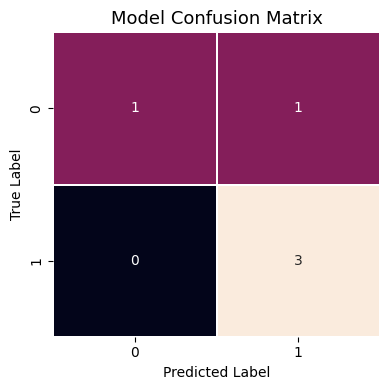

In [23]:
import sys

sys.path.insert(0, '../')
# from ..visual import *
import visual

y_pred, prob = myNB.predict(x_test[0:5])
# y_pred
# Calculate the confusion matrix


y_test[0:5], y_pred
visual.plot_confusion_matrix(y_test[0:5], y_pred, label_names=[0,1])

In [13]:
gnb = GaussianNB()

# train
gnb_model = gnb.fit(X=x_train, y=y_train)

# what this model contains
gnb_model.classes_, gnb_model.feature_names_in_, gnb.epsilon_, gnb.var_, gnb.theta_

(array([0, 1]),
 array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se',
        'smoothness_se', 'compactness_se', 'concavity_se',
        'concave points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
        'smoothness_worst', 'compactness_worst', 'concavity_worst',
        'concave points_worst', 'symmetry_worst',
        'fractal_dimension_worst'], dtype=object),
 np.float64(0.00032977187747845445),
 array([[3.21456908e+00, 1.65997795e+01, 1.41691097e+02, 1.84795169e+04,
         5.15764571e-04, 1.60020424e-03, 2.52619845e-03, 5.91767375e-04,
         9.92568825e-04, 3.80837761e-04, 1.37533563e-02, 3.91672663e-01,
         6.17843456e-01, 8.34425569e+01, 3.39537320e-04, 6.34952119e-04,
         1.648

In [14]:
x_test.iloc[0:10]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.088420,0.057780,0.1856,0.06402,...,15.700,15.98,102.80,745.5,0.13130,0.17880,0.25600,0.12210,0.2889,0.08006
30,18.630,25.11,124.80,1088.0,0.10640,0.18870,0.231900,0.124400,0.2183,0.06197,...,23.150,34.01,160.50,1670.0,0.14910,0.42570,0.61330,0.18480,0.3444,0.09782
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.087730,0.2175,0.06218,...,19.380,31.03,129.30,1165.0,0.14150,0.46650,0.70870,0.22480,0.4824,0.09614
262,17.290,22.13,114.40,947.8,0.08999,0.12730,0.096970,0.075070,0.2108,0.05464,...,20.390,27.24,137.90,1295.0,0.11340,0.28670,0.22980,0.15280,0.3067,0.07484
89,14.640,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.070640,0.2116,0.06346,...,16.340,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473
350,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,0.1671,0.05731,...,13.280,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
224,13.270,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.024560,0.1496,0.05674,...,15.140,23.60,98.84,708.8,0.12760,0.13110,0.17860,0.09678,0.2506,0.07623
480,12.160,18.03,78.29,455.3,0.09087,0.07838,0.029160,0.015270,0.1464,0.06284,...,13.340,27.87,88.83,547.4,0.12080,0.22790,0.16200,0.05690,0.2406,0.07729
267,13.590,21.84,87.16,561.0,0.07956,0.08259,0.040720,0.021420,0.1635,0.05859,...,14.800,30.04,97.66,661.5,0.10050,0.17300,0.14530,0.06189,0.2446,0.07024
59,8.618,11.79,54.34,224.5,0.09752,0.05272,0.020610,0.007799,0.1683,0.07187,...,9.507,15.40,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026


[[87  1]
 [ 7 48]]


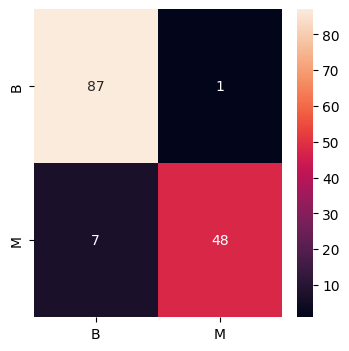

In [15]:
y_pred = gnb_model.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, xticklabels=["B","M"], yticklabels=["B","M"])
plt.show()